# Projet Search-Engine - Fondement de la Recherche d'Information-WEB

## Requirements installation
Run:
```
pip3 install -r requirements.txt
```

# Tâche 1 : Création d’un index inversé et moteur de recherche booléen et vectorie

## 2.1 Traitements linguistiques

### Tokenisation des collections

#### CACM

importing datasets

In [5]:
import file_reading
import tokenization

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/victoraubin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


CACM (quick import and tokenization)

In [6]:
CACM_documents = file_reading.read_cacm()  # raw dataset
CACM_tokens_NLTK = tokenization.tokenize_CACM(CACM_documents)  # tokenization with NLTK and stoplist
CACM_tokens = tokenization.tokenize_no_nltk_CACM(CACM_documents)  # Manual tokenization (stoplist)

#### CS276

Storing tokenized dataset into a pickle file that's reused

In [7]:
import pickle
import os

if os.path.exists("tokenized_data/CS276_docs.pickle"):
    print("getting CS276 docs pickle")
    CS276_docs = pickle.load(open("tokenized_data/CS276_docs.pickle", 'rb'))
else:
    print("reading CS297")
    CS276_docs = file_reading.read_cs276()
    print("storing CS297 docs in a pickle")
    pickle.dump(CS276_docs, open("tokenized_data/CS276_docs.pickle", 'wb'))

if os.path.exists("tokenized_data/CS276_tokens.pickle"):
    print("getting CS276 tokens pickle")
    CS276_tokens = pickle.load(open("tokenized_data/CS276_tokens.pickle", 'rb'))
else:
    print("making CS276 tokens")
    CS276_tokens = tokenization.tokenize_CS276(CS276_docs)
    print("storing CS276 in a pickle")
    pickle.dump(CS276_tokens, open("tokenized_data/CS276_tokens.pickle", "wb"))
print("done")

getting CS276 docs pickle
getting CS276 tokens pickle
done


### Nombre de tokens

In [8]:
print("Nombre de tokens pour CACM (sans NLTK):")
T1 = sum([len(L) for L in CACM_tokens])
print(T1)

print("Nombre de tokens pour CACM (avec NLTK):")
T1 = sum([len(L) for L in CACM_tokens_NLTK])
print(T1)

print("Nombre de tokens pour CS276:")
T1 = sum([len(L) for L in CS276_tokens])
print(T1)

Nombre de tokens pour CACM (sans NLTK):
73126
Nombre de tokens pour CACM (avec NLTK):
92997
Nombre de tokens pour CS276:
2704051


### Taille du vocabulaire

In [9]:
print("Vocabulaire pour CACM: ")
M1 = len(CACM_tokens)
print(M1)
# print(CACM_tokens.keys())

print("Vocabulaire pour CACM (avec NLTK): ")
M1 = len(CACM_tokens_NLTK)
print(M1)
# print(CACM_tokens.keys())

print("Vocabulaire pour CS276_tokens: ")
M1 = len(CS276_tokens)
print(M1)
# print(CS276_tokens.keys())

Vocabulaire pour CACM: 
9496
Vocabulaire pour CACM (avec NLTK): 
11157
Vocabulaire pour CS276_tokens: 
346650


### Loi Heap et estimation pour 1M vocabulaire

CACM

In [10]:
d_half = tokenization.tokenize_no_nltk_CACM(CACM_documents[:len(CACM_documents)//2])
tokenization.print_heap_law(CACM_tokens, d_half, "CACM without NLTK")

heap low for collection CACM without NLTK
K = 0.16412801642665256, b = 0.9790887476936934
Pour 1 million de tokens, vocabulaire :
122946


In [11]:
d_half = tokenization.tokenize_CACM(CACM_documents[:len(CACM_documents)//2])
tokenization.print_heap_law(CACM_tokens_NLTK, d_half, "CACM with NLTK")

heap low for collection CACM with NLTK
K = 0.19899997076491205, b = 0.9557661482715758
Pour 1 million de tokens, vocabulaire :
108006


CS276

In [12]:
CS276_tokens_heap = CS276_tokens.copy()
ids_to_delete = list(range(len(CS276_docs)//2))

for document_ids in CS276_tokens_heap.values():
    filter(lambda d_id: d_id not in ids_to_delete, document_ids)

tokenization.print_heap_law(CS276_tokens, d_half, "CS276")

heap low for collection CS276
K = 0.11194888485284703, b = 1.0091505625243606
Pour 1 million de tokens, vocabulaire :
127034


### Graphes frequence / rang et log(frequence) / log(rang)

In [13]:
freq_CACM = tokenization.word_frequency(CACM_tokens)
freq_CACM_NLTK = tokenization.word_frequency(CACM_tokens_NLTK)
freq_CS276 = tokenization.word_frequency(CS276_tokens)

#### CACM without NLTK

In [14]:
import matplotlib.pyplot as plt
list_word = [tokenization.Token_sorter(word, freq_CACM[word]) for word in freq_CACM.keys()]
list_word.sort()
X = range(1, len(list_word) + 1)
Y = [word.f for word in list_word]
plt.title('pour CACM sans NLTK')
plt.ylabel('frequence')
plt.xlabel('rang')
plt.plot(X, Y,)
plt.show()

<Figure size 640x480 with 1 Axes>

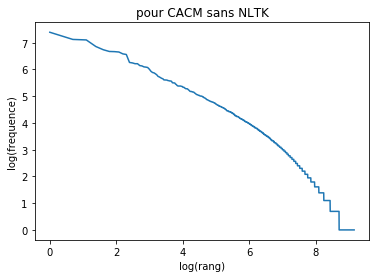

In [15]:
from numpy import log, array
X2= log(array(X))
Y2 = log(array(Y))
plt.title('pour CACM sans NLTK')
plt.ylabel('log(frequence)')
plt.xlabel('log(rang)')
plt.plot(X2, Y2)
plt.show()

#### CACM with NLTK

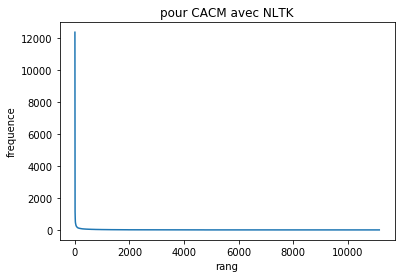

In [16]:
list_word = [tokenization.Token_sorter(word, freq_CACM_NLTK[word]) for word in freq_CACM_NLTK.keys()]
list_word.sort()
X = range(1, len(list_word) + 1)
Y = [word.f for word in list_word]
plt.title('pour CACM avec NLTK')
plt.ylabel('frequence')
plt.xlabel('rang')
plt.plot(X, Y)
plt.show()

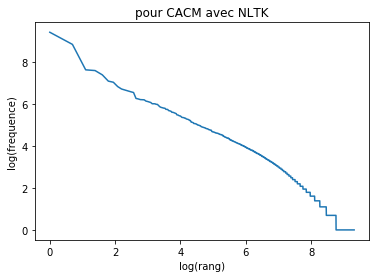

In [17]:
from numpy import log, array
X2= log(array(X))
Y2 = log(array(Y))
plt.title('pour CACM avec NLTK')
plt.ylabel('log(frequence)')
plt.xlabel('log(rang)')
plt.plot(X2, Y2)
plt.show()

#### CS276

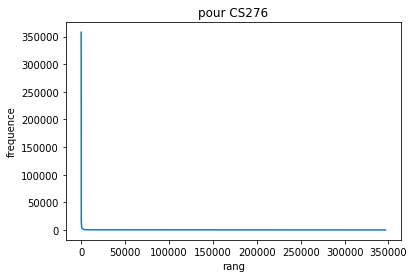

In [18]:
list_word = [tokenization.Token_sorter(word, freq_CS276[word]) for word in freq_CS276.keys()]
list_word.sort()
X = range(1, len(list_word) + 1)
Y = [word.f for word in list_word]
plt.plot(X, Y)
plt.title('pour CS276')
plt.ylabel('frequence')
plt.xlabel('rang')
plt.show()

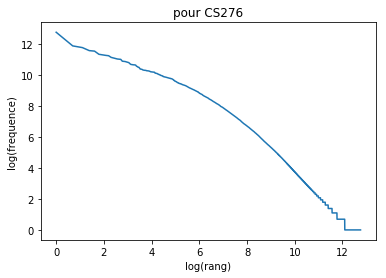

In [19]:
from numpy import log, array
X2= log(array(X))
Y2 = log(array(Y))
plt.title('pour CS276')
plt.ylabel('log(frequence)')
plt.xlabel('log(rang)')
plt.plot(X2, Y2)
plt.show()

### Index inversé

On crée des indexes inversés pour les corpus CACM et CS276 dans des fichiers `invesed_index/cacm/cacm.output`

Des fichiers intermédiaires sont générés pour alleger la mémoire `invesed_index/cacm/cacm.output_x`

Chaque ligne contient l'id du token en premiere position, puis la liste des id des documents qui contiennent ce token

In [20]:
import inversed_index
from time import time

#### CACM without NKTK (better performances)

In [21]:
cacm_dict_term = {}
i = 0
for token in CACM_tokens:
    if token not in cacm_dict_term:
        cacm_dict_term[token] = i
        i += 1

start = time()
inversed_index.index_inverse_global(CACM_documents, 1000,
                                    "inversed_index/cacm/cacm.output",
                                    cacm_dict_term,
                                    type="CACM")
print("l'indexation de CACM a pris", time() - start, "secondes")

l'indexation de CACM a pris 6.653420925140381 secondes


#### CS276 (supprimez les fichiers inversed_index/cs276/cs276.output pour les recalculer)

In [22]:
cs276_dict_term = {}
i = 0
for token in CS276_tokens:
    if token not in cs276_dict_term:
        cs276_dict_term[token] = i
        i += 1

if not os.path.exists("inversed_index/cs276/cs276.output"):
    start = time()
    inversed_index.index_inverse_global(CS276_docs, 1000,
                                        "inversed_index/cs276/cs276.output",
                                        cs276_dict_term,
                                        type="CS276")
    print("l'indexation de CS276 a pris", time() - start, "secondes")

# Index inversé fréquentiel

On crée des indexes inversés fréquentiels pour les corpus CACM et CS276 dans des fichiers frequential_index/cacm/cacm.output

Des fichiers intermédiaires sont générés pour alleger la mémoire frequential_index/cacm/cacm.output_x

Chaque ligne contient l'id du token en premiere position, puis la liste des couples document_id/frequence

In [23]:
import frequency_index

#### CACM without NKTK (better performances)

In [24]:
start = time()
frequency_index.index_inverse_global_with_frequency(CACM_documents, 1000,
                                                      "frequential_index/cacm/cacm.output",
                                                      cacm_dict_term,
                                                      type="CACM")
print("l'indexation fréquentielle de CACM a pris", time() - start, "secondes")

l'indexation fréquentielle de CACM a pris 6.983358144760132 secondes


#### CS276

In [25]:
if not os.path.exists("frequential_index/cs276/cs276.output"):
    start = time()
    frequency_index.index_inverse_global_with_frequency(CS276_docs, 1000,
                                                      "frequential_index/cs276/cs276.output",
                                                      cs276_dict_term,
                                                      type="CS276")
    print("l'indexation fréquentielle de CS276 a pris", time() - start, "secondes")

## Modele booleen

La recherche booléenne prend une entrée booléenne du type "token&token|(!token&token)". L'expression booleenne est transformée en expression polonaise pour prendre en compte efficacement les parenthèses. Le programme renvoie un set des ids des documents qui contiennent l'expression et le temps de utilisé pour calculer. 

In [26]:
import boolean_model

#### CACM

In [27]:
boolean_queries = [
    "Algebraic&Language|(Preliminary&printer)",
    "Algebraic&!Language",
    "The&Secant&Method&for&Simultaneous&Nonlinear&Equations",
    "Binary&Representation|(Algebraic&Language)"
]
for query in boolean_queries:
    print()
    debut = time()
    result = boolean_model.boolean_model(query, CACM_documents, cacm_dict_term, type="CACM")
    print("query:", query)
    print("request time:", time() - debut)
    print("result:", result)


query: Algebraic&Language|(Preliminary&printer)
request time: 0.017004013061523438
result: {'1223', '1471', '2645', '1543', '1253', '93', '99', '1216', '3077', '2958', '2547', '54', '1589', '1453', '1', '1824'}

query: Algebraic&!Language
request time: 0.0039060115814208984
result: set()

query: The&Secant&Method&for&Simultaneous&Nonlinear&Equations
request time: 0.009938955307006836
result: {'39'}

query: Binary&Representation|(Algebraic&Language)
request time: 0.007287740707397461
result: {'40', '2525', '2987', '2801', '2787', '3041', '3115', '2446', '2702'}


#### CS276

In [28]:
from time import time

boolean_queries = [
    "contact&us&about&us&food&allergies&stanford&medicine",
    "contact&us&about&us&!food",
    "(climate&change)|(agricultural&adaptation)&!politic&!university"
]
for query in boolean_queries:
    print()
    debut = time()
    result = boolean_model.boolean_model(query, CS276_docs, cs276_dict_term, type="CS276")
    print("query:", query)
    print("request time:", time() - debut)
    print("result:", result)


query: contact&us&about&us&food&allergies&stanford&medicine
request time: 2.088498830795288
result: {'39841', '79807', '29306', '85984', '30431', '45696'}

query: contact&us&about&us&!food
request time: 0.3460252285003662
result: set()

query: (climate&change)|(agricultural&adaptation)&!politic&!university
request time: 3.451915979385376
result: {'62699', '12347', '41330', '101', '5639', '75837', '79422', '64677', '85249', '43335', '47939', '70841', '79499', '64017', '68472', '9770', '67183', '77591', '95150', '91247', '74111', '59786', '59864', '9858', '19578', '5601', '41283', '73222', '79217', '39438', '59776', '38888', '78063', '80890', '13088', '79767', '17297', '77225', '90285', '45966', '42159', '73546', '61106', '67305', '11385', '45808', '59226', '98803', '45520', '41869', '77739', '37209', '64616', '72975', '75668', '14972', '14684', '79450', '81773', '62709', '86365', '36175', '65663', '13479', '66766', '42484', '88314', '91372', '11133', '39548', '75381', '79757', '35671',

## Modele vectoriel

In [29]:
import vectorial_model
from importlib import reload
vectorial_model = reload(vectorial_model)

##### CACM

In [30]:
# ponderation tf-idf
start = time()
found_documents = vectorial_model.modele_vectoriel("paper",
                                                   CACM_documents,
                                                   cacm_dict_term,
                                                   ponderation="tfidf",
                                                   type="CACM")
print("request time", time() - start)
print(found_documents[:5])

request time 0.16472125053405762
[2047, 2033, 2030, 2024, 2020]


In [31]:
# ponderation tf-idf normalisé
start = time()
found_documents = vectorial_model.modele_vectoriel("This paper describes an alternate method for summing a set of floating-point numbers.  Comparison of the error bound for this method with that of the standard summation method shows that it is considerably less sensitive to propagation of round-off error.",
                                                   CACM_documents,
                                                   cacm_dict_term,
                                                   ponderation="tfidf_norm",
                                                   type="CACM")
print("request time", time() - start)
print(found_documents[:5])

request time 13.099160194396973
[1453, 3147, 3034, 497, 2367]


In [32]:
# ponderation frequence normalisé
start = time()
found_documents = vectorial_model.modele_vectoriel("This paper describes an alternate method for summing a set of floating-point numbers.  Comparison of the error bound for this method with that of the standard summation method shows that it is considerably less sensitive to propagation of round-off error.",
                                                   CACM_documents,
                                                   cacm_dict_term,
                                                   ponderation="norm_freq",
                                                   type="CACM")
print("request time", time() - start)
print(found_documents[:5])

request time 8.909752130508423
[2024, 2020, 1978, 1945, 1937]


#### CS276

In [33]:
start = time()
found_documents = vectorial_model.modele_vectoriel("hello hello",
                                                   CS276_docs,
                                                   cs276_dict_term,
                                                   ponderation="tfidf",
                                                   type="CS276")
print("request time", time() - start)
print(found_documents[:5])

request time 2.0802083015441895
[4769, 73673, 3922, 36664, 52983]


## Evaluation

### Performances

Temps de calcul donné dans les cellules correspondantes

index inversé CACM: 463 KB

index inversé CS276: 81,3 MB

fréquence index CACM: 659 KB

fréquence index CS276: 93,5 MB

In [34]:
start = time()
found_documents = vectorial_model.modele_vectoriel("Accelerating Convergence of Iterative Processes",
                                                   CACM_documents,
                                                   cacm_dict_term,
                                                   ponderation="tfidf",
                                                   type="CACM")
print("request time", time() - start)
print(found_documents)

request time 0.048876047134399414
[2378, 2320, 1749, 1748, 1135, 3141, 3128, 3056, 1518, 3043, 3039, 2522, 2519, 2504, 1458, 942, 1960, 2979, 412, 1928, 2438, 1410, 2931, 2922, 2920, 1385, 2912, 2911, 2396, 2895, 2383, 2379, 2376, 2371, 1854, 825, 1846, 2865, 1828, 2851, 2848, 1308, 2327, 278, 1272, 243, 2795, 224, 2777, 1753, 1747, 2255, 2740, 2228, 1199, 1198, 1706, 1698, 2717, 1145, 3184, 2672, 618, 2150, 1098, 2629, 3140, 3127, 3120, 2080, 2581, 2580, 2060, 3081, 3078, 1541, 3072, 2342, 2408, 2210, 94, 1999, 2490, 2470, 2981, 2454, 2943, 1888, 1369, 319, 313, 286, 1805, 748, 2194, 636, 1643, 1622, 2105, 1593, 2266, 1722, 2047, 2544, 1435, 2353, 1811, 1806, 1260, 1212, 2742, 2229, 1197, 1159, 1586, 1587, 3073, 2307, 3025, 1873, 3182, 894, 380, 1692, 111, 1111, 1601, 20]


In [35]:
CACM_documents[1143]

['Digital Computer Determination of Alpha Source Activity',
 'A technique is described for determining the activity and homogeneity of an alpha source.   It is believed that the technique, using a digital computer, has many uses and applications in the field  of nuclear physics. The technique involves computer manipulation of the digital image of the nuclear  source.  Experimental details are given.',
 '']

In [36]:
import evaluation

#### Courbe precision / recall

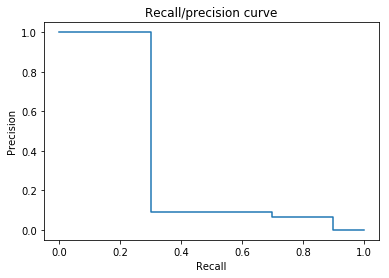

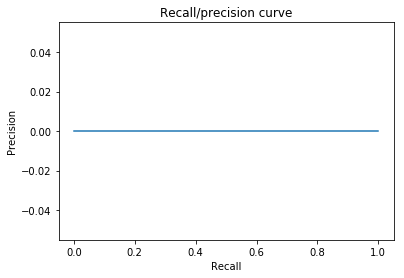

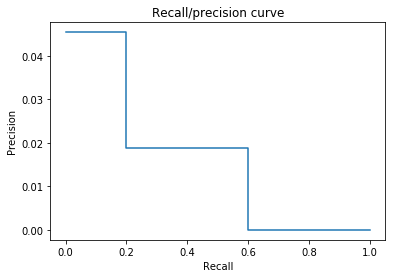

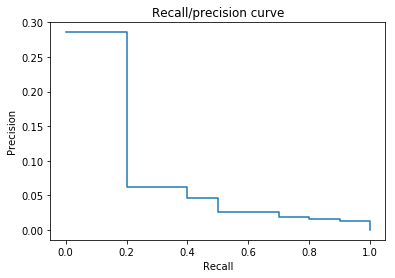

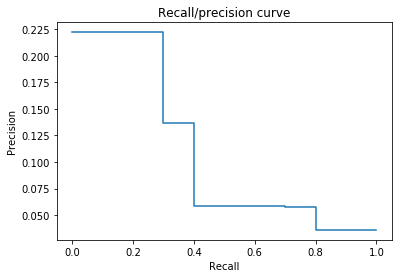

In [37]:
file_query = open("./Data/CACM/query.text")

pred = []
true = []
queries = []
current_section = -1
for line in file_query.readlines():
    if line[0] == '.':
        if line[1] == 'I':
            queries.append([int(line.split(" ")[1]), ""])
        elif line[1] == 'W':
            current_section = 1
        else:
            current_section = -1
    else:
        if current_section >= 0:
            queries[-1][current_section] += " " + line.strip('\n')

file_query.close()

for query in queries[:5]:
    pred.append(vectorial_model.modele_vectoriel(query[1],
                                                   CACM_documents,
                                                   cacm_dict_term,
                                                   ponderation="tfidf",
                                                   type="CACM")[::-1])
true = [[] for _ in range(len(queries))]
target_file = open("./Data/CACM/qrels.text")

for target in target_file.readlines():
    index = target.split(" ")[0]
    if index.startswith("0"):
        index = index[1:]
    index = int(index)
    true[index - 1].append(int(target.split(" ")[1]))
target_file.close() 


evaluation.plot_precision_recall_curve(pred[0], true[0])
plt.show()

evaluation.plot_precision_recall_curve(pred[1], true[1])
plt.show()

evaluation.plot_precision_recall_curve(pred[2], true[2])
plt.show()

evaluation.plot_precision_recall_curve(pred[3], true[3])
plt.show()

evaluation.plot_precision_recall_curve(pred[4], true[4])
plt.show()

On remarque que notre modèle vectoriel a un très bon recall mais une mauvaise précision. Dans une nouvelle version il faudrait limiter le nombre de résultat pour améliorer l'évaluation